In [26]:
# 1. Chargement des Bibliothèques
import pandas as pd  # Pour la manipulation des données
import numpy as np  # Pour les calculs numériques
import matplotlib.pyplot as plt  # Pour les visualisations
import seaborn as sns  # Pour des visualisations statistiques
from sklearn.model_selection import train_test_split  # Pour diviser les données
from sklearn.ensemble import RandomForestRegressor  # Modèle de régression
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Pour évaluer le modèle
from sklearn.preprocessing import StandardScaler  # Pour normaliser les données
import joblib  # Pour sauvegarder le modèle

# Configuration de l'affichage des graphiques
%matplotlib inline
sns.set(style="whitegrid")

In [27]:
# 2. Chargement des Données
# Charger les données à partir d'un fichier CSV
df = pd.read_csv('train.csv')


In [28]:
# Afficher les premières lignes des données pour une inspection initiale
print("Aperçu des données :")
print(df.head())

Aperçu des données :
   Id MSZoning  LotArea  OverallQual  OverallCond  YearBuilt ExterQual  \
0   1       RL     8450            7            5       2003        Gd   
1   2       RL     9600            6            8       1976        TA   
2   3       RL    11250            7            5       2001        Gd   
3   4       RL     9550            7            5       1915        TA   
4   5       RL    14260            8            5       2000        Gd   

   TotalBsmtSF  GrLivArea  SalePrice  BedroomAbvGr  FullBath  HalfBath  \
0          856       1710     208500             2         1         1   
1         1262       1262     181500             4         3         1   
2          920       1786     223500             3         3         0   
3          756       1717     140000             1         3         1   
4         1145       2198     250000             4         1         1   

   Fireplaces  GarageCars  GarageArea  PoolArea  
0           0           3         127  

In [29]:
# 3. Prétraitement des Données
# Vérifier les colonnes disponibles et les types de données
print("Colonnes disponibles :")
print(df.columns)


Colonnes disponibles :
Index(['Id', 'MSZoning', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'ExterQual', 'TotalBsmtSF', 'GrLivArea', 'SalePrice', 'BedroomAbvGr',
       'FullBath', 'HalfBath', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PoolArea'],
      dtype='object')


In [30]:
# Supprimer les colonnes inutiles et garder les pertinentes
df = df[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 
          'GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 
          'Fireplaces', 'GarageCars', 'GarageArea', 'PoolArea', 'SalePrice']]

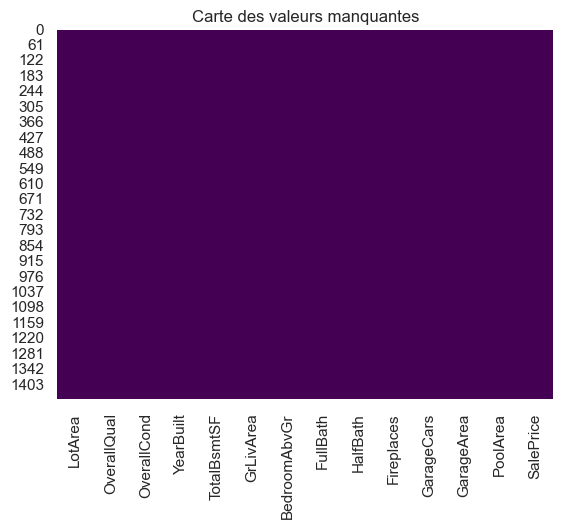

In [31]:
# Visualiser les valeurs manquantes via une carte
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Carte des valeurs manquantes')
plt.show()

In [33]:
# Supprimer les lignes avec des valeurs manquantes
df = df.dropna()

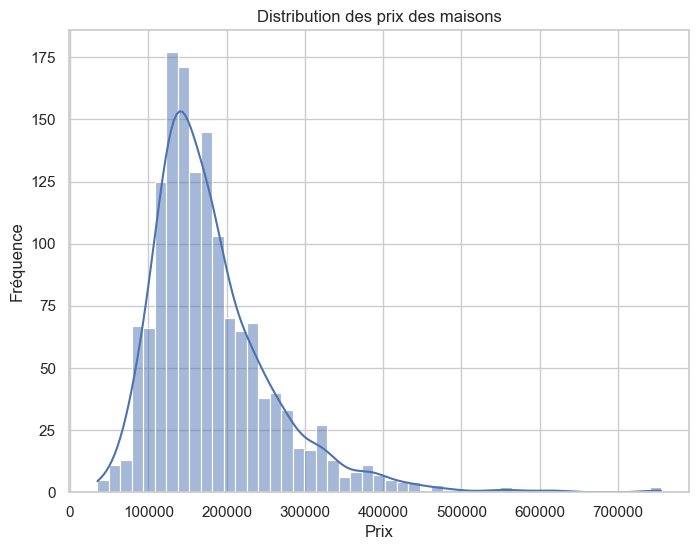

In [34]:
# 4. Analyse Exploratoire des Données (EDA)
# Visualiser la distribution des prix
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution des prix des maisons')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

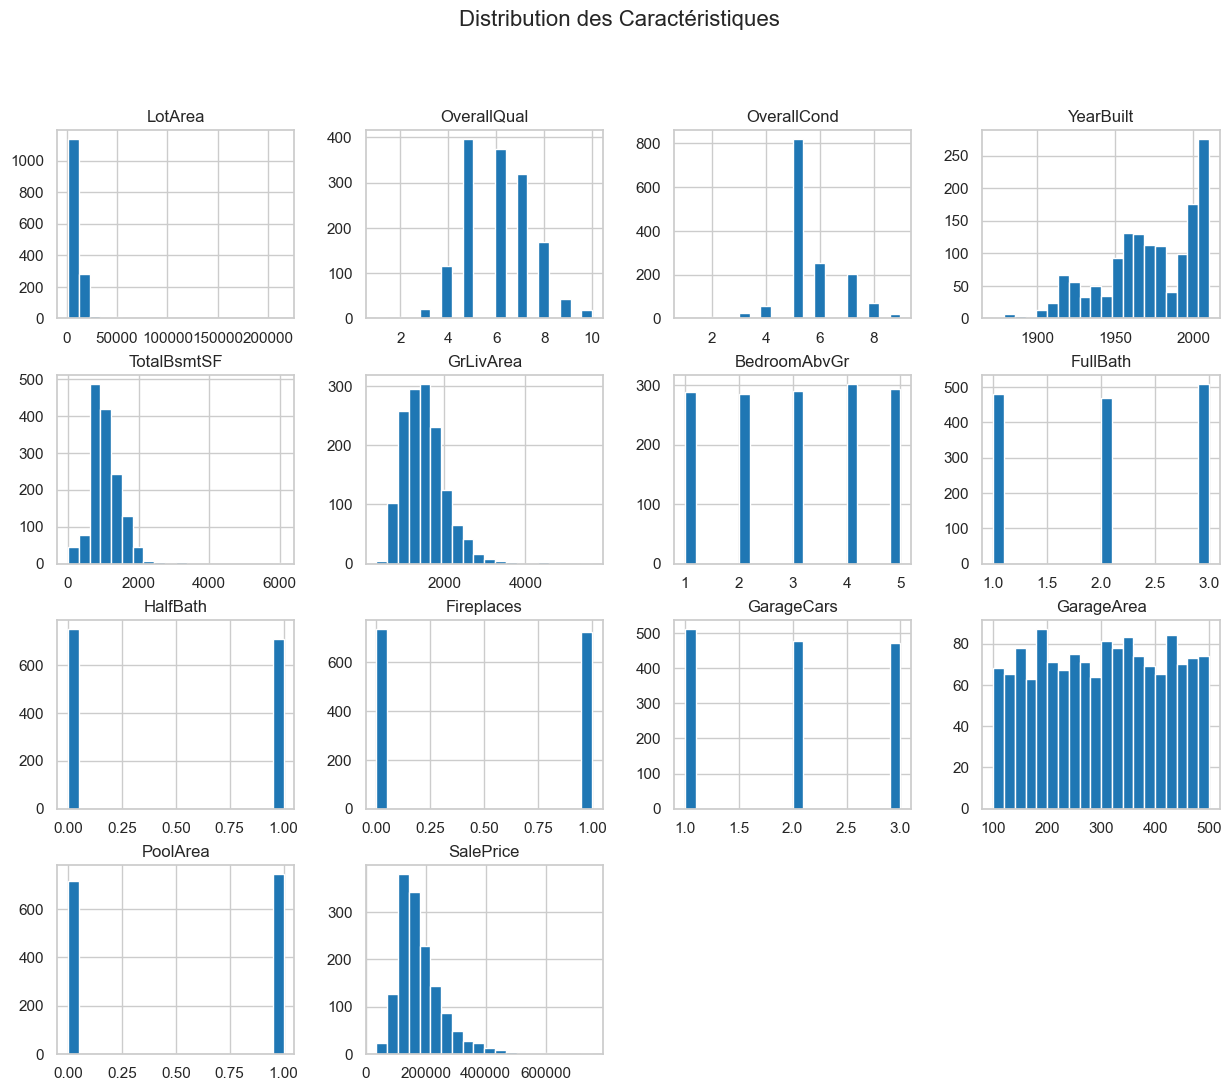

In [35]:
# Histogrammes des principales caractéristiques
df.hist(figsize=(15, 12), bins=20, color="#1f77b4")
plt.suptitle("Distribution des Caractéristiques", fontsize=16)
plt.show()

In [36]:
# 5. Calculer la corrélation
correlation_matrix = df.corr()


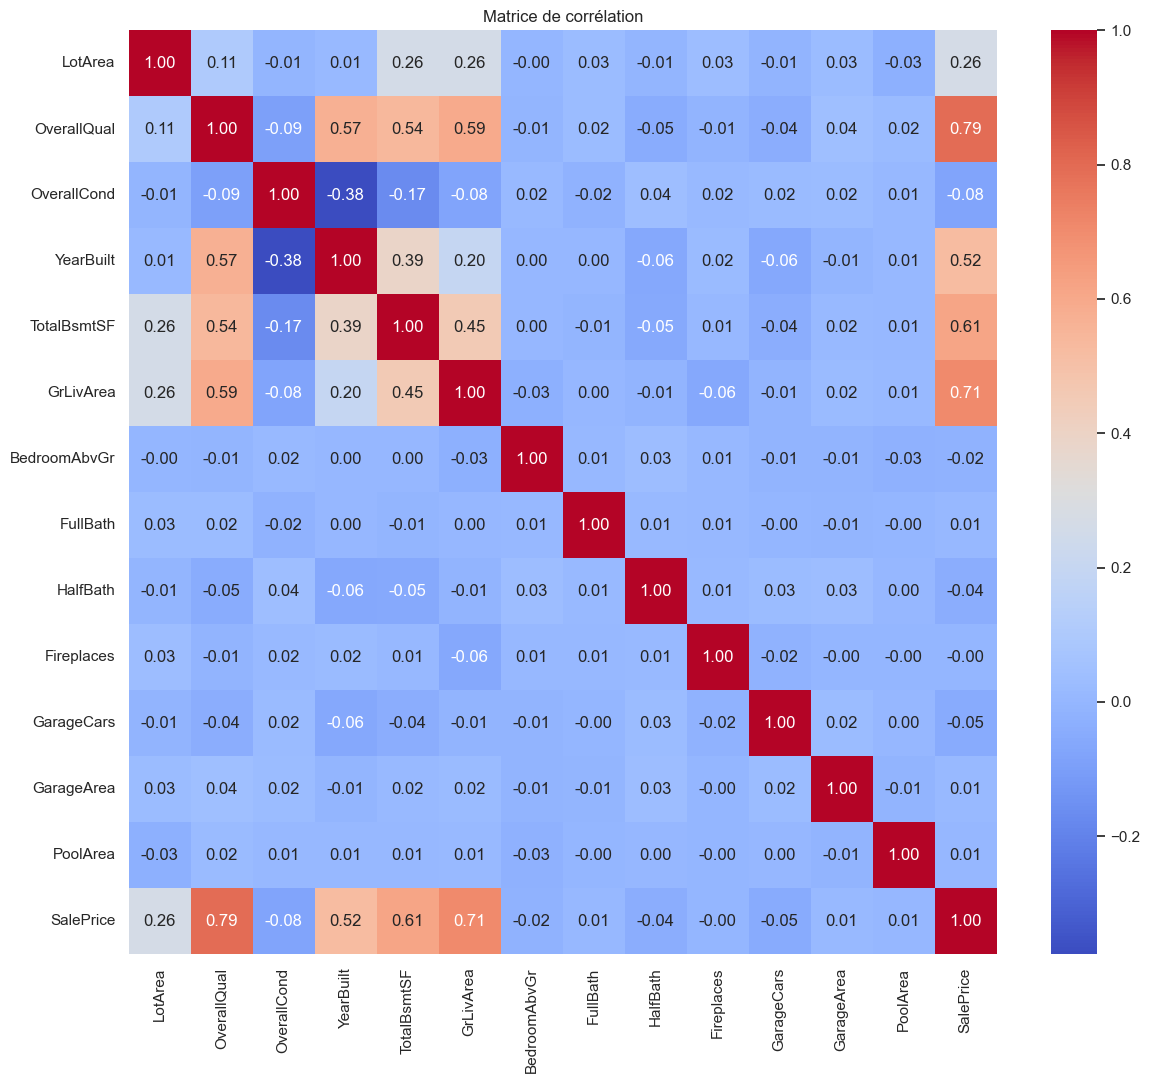

In [37]:
# Visualiser la corrélation
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [38]:
# 6. Séparation des Données
# Séparer les caractéristiques (X) de la variable cible (y)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [39]:
# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [40]:
#Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [41]:
# 7. Choix et Entraînement du Modèle
# Créer et entraîner le modèle de régression Random Forest
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)  # Augmenter le nombre d'arbres
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [42]:
# 8. Évaluation du Modèle
# Prédire les valeurs sur l'ensemble de test
y_pred = model.predict(X_test)


In [43]:
# Calculer les métriques d'évaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [44]:
# Afficher les résultats d'évaluation
print(f"Erreur Absolue Moyenne (MAE): {mae:.2f}")
print(f"Erreur Quadratique Moyenne (MSE): {mse:.2f}")
print(f"Racine de l'Erreur Quadratique Moyenne (RMSE): {rmse:.2f}")

Erreur Absolue Moyenne (MAE): 19102.93
Erreur Quadratique Moyenne (MSE): 933762820.09
Racine de l'Erreur Quadratique Moyenne (RMSE): 30557.53


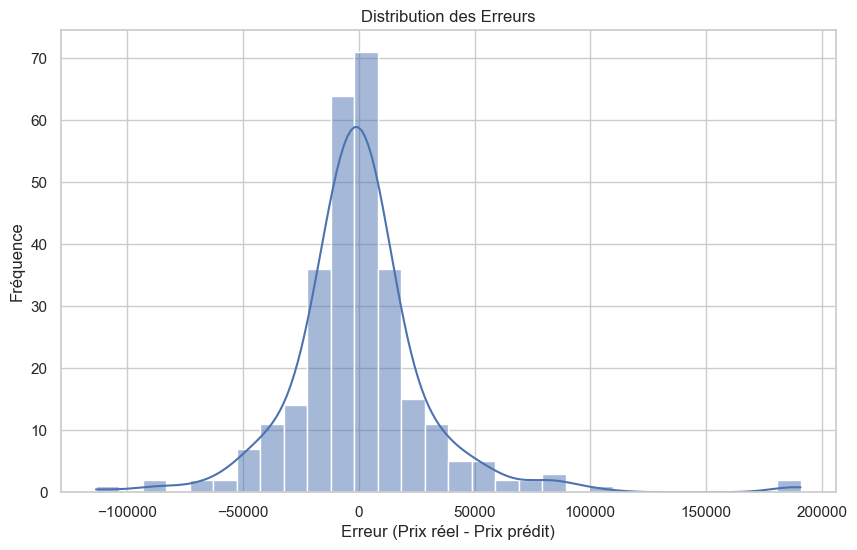

In [45]:
# 9. Visualisation des Résultats
# Visualiser la distribution des erreurs
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.title("Distribution des Erreurs")
plt.xlabel("Erreur (Prix réel - Prix prédit)")
plt.ylabel("Fréquence")
plt.show()

In [47]:
#résumé statistique
df.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,BedroomAbvGr,FullBath,HalfBath,Fireplaces,GarageCars,GarageArea,PoolArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1971.267808,1057.429452,1515.463699,3.018493,2.019178,0.486301,0.495890,1.973288,301.421918,0.510274,180921.195890
std,9981.264932,1.382997,1.112799,30.202904,438.705324,525.480383,1.414335,0.823516,0.499984,0.500154,0.820387,114.676277,0.500066,79442.502883
min,1300.000000,1.000000,1.000000,1872.000000,0.000000,334.000000,1.000000,1.000000,0.000000,0.000000,1.000000,100.000000,0.000000,34900.000000
25%,7553.500000,5.000000,5.000000,1954.000000,795.750000,1129.500000,2.000000,1.000000,0.000000,0.000000,1.000000,201.000000,0.000000,129975.000000
50%,9478.500000,6.000000,5.000000,1973.000000,991.500000,1464.000000,3.000000,2.000000,0.000000,0.000000,2.000000,304.000000,1.000000,163000.000000
75%,11601.500000,7.000000,6.000000,2000.000000,1298.250000,1776.750000,4.000000,3.000000,1.000000,1.000000,3.000000,400.250000,1.000000,214000.000000
max,215245.000000,10.000000,9.000000,2010.000000,6110.000000,5642.000000,5.000000,3.000000,1.000000,1.000000,3.000000,499.000000,1.000000,755000.000000


In [48]:
# 10. Sauvegarder le modèle et le scaler pour une utilisation future
joblib.dump(model, 'model_boston_housing.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']